In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import numpy as np
from matplotlib import cm
import datetime
from scipy.cluster.hierarchy import dendrogram

## Import data

In [3]:
df_z = pd.read_csv('../common/covid_cases_z_trans.csv')

In [4]:
df_case_per_popu = pd.read_csv('../common/cases_per_popu_mod.csv')

In [5]:
df_z.drop(['Unnamed: 0'],axis=1, inplace=True)

In [6]:
df_case_per_popu.drop(['Unnamed: 0'],axis=1, inplace=True)

## Look at the files

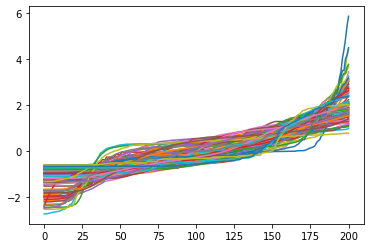

In [11]:
df_z.plot(legend='')

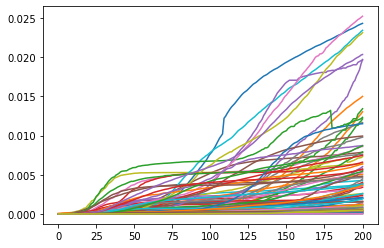

In [12]:
df_case_per_popu.plot(legend='')

In [94]:
countries_z = []
for col in df_z.columns:
    countries_z.append(col)

countries_cp = []
for col in df_case_per_popu.columns:
    countries_cp.append(col)

## K-means on z-transformed

In [38]:
kmeans_z = KMeans(n_clusters=4, random_state=4).fit(df_z.T)

In [39]:
labels_z = kmeans_z.labels_[:]
labels_z

array([1, 1, 1, 2, 0, 0, 0, 2, 1, 1, 2, 0, 1, 1, 3, 2, 3, 2, 1, 0, 1, 2,
       1, 2, 2, 3, 0, 3, 3, 2, 1, 1, 0, 1, 2, 1, 2, 1, 1, 1, 0, 2, 2, 2,
       1, 2, 3, 1, 1, 1, 3, 1, 2, 0, 2, 0, 0, 1, 3, 0, 1, 0, 2, 0, 1, 0,
       1, 0, 0, 0, 3, 3, 1, 3, 3, 0, 0, 2, 2, 0, 3, 2, 3, 1, 0, 2, 0, 0,
       1, 1, 1])

In [44]:
print("Countries in cluster 0:", np.count_nonzero(labels_z == 0))
print("Countries in cluster 1:", np.count_nonzero(labels_z == 1))
print("Countries in cluster 2:", np.count_nonzero(labels_z == 2))
print("Countries in cluster 3:", np.count_nonzero(labels_z == 3))

Countries in cluster 0: 24
Countries in cluster 1: 31
Countries in cluster 2: 22
Countries in cluster 3: 14


In [40]:
#This is to make a new data frame for each cluster and then drop the countries whcih is not in the cluster
df0_z = df_z.copy()
df1_z = df_z.copy()
df2_z = df_z.copy()
df3_z = df_z.copy()

for i in range(len(labels_z)):
    if labels_z[i] == 0:
        drop_c = countries_z[i]
        df1_z.drop([drop_c], axis=1, inplace=True)
        df2_z.drop([drop_c], axis=1, inplace=True)
        df3_z.drop([drop_c], axis=1, inplace=True)
    elif labels_z[i] == 1:
        drop_c = countries_z[i]
        df0_z.drop([drop_c], axis=1, inplace=True)
        df2_z.drop([drop_c], axis=1, inplace=True)
        df3_z.drop([drop_c], axis=1, inplace=True)
    elif labels_z[i] == 2:
        drop_c = countries_z[i]
        df0_z.drop([drop_c], axis=1, inplace=True)
        df1_z.drop([drop_c], axis=1, inplace=True)
        df3_z.drop([drop_c], axis=1, inplace=True)
    elif labels_z[i] == 3:
        drop_c = countries_z[i]
        df0_z.drop([drop_c], axis=1, inplace=True)
        df1_z.drop([drop_c], axis=1, inplace=True)
        df2_z.drop([drop_c], axis=1, inplace=True)

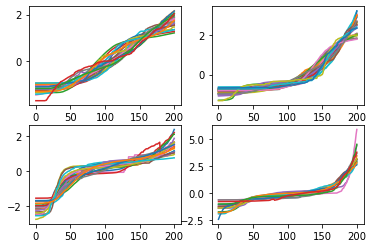

In [41]:
fig, axes = plt.subplots(nrows=2, ncols=2)
df0_z.plot(legend='', ax=axes[0,0])
df1_z.plot(legend='', ax=axes[0,1])
df2_z.plot(legend='', ax=axes[1,0])
df3_z.plot(legend='', ax=axes[1,1])

## K-means on cases/population

In [54]:
kmeans_cp = KMeans(n_clusters=3, random_state=4).fit(df_case_per_popu.T)
labels_cp = kmeans_cp.labels_[:]
labels_cp

array([0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 2, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 2, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 2, 0, 0, 0,
       0])

In [55]:
print("Countries in cluster 0:", np.count_nonzero(labels_cp == 0))
print("Countries in cluster 1:", np.count_nonzero(labels_cp == 1))
print("Countries in cluster 2:", np.count_nonzero(labels_cp == 2))
print("Countries in cluster 3:", np.count_nonzero(labels_cp == 3))

Countries in cluster 0: 60
Countries in cluster 1: 23
Countries in cluster 2: 6
Countries in cluster 3: 0


In [56]:
#This is to make a new data frame for each cluster and then drop the countries whcih is not in the cluster
df0_cp = df_case_per_popu.copy()
df1_cp = df_case_per_popu.copy()
df2_cp = df_case_per_popu.copy()
df3_cp = df_case_per_popu.copy()

for i in range(len(labels_cp)):
    if labels_cp[i] == 0:
        drop_c = countries_cp[i]
        df1_cp.drop([drop_c], axis=1, inplace=True)
        df2_cp.drop([drop_c], axis=1, inplace=True)
        df3_cp.drop([drop_c], axis=1, inplace=True)
    elif labels_cp[i] == 1:
        drop_c = countries_cp[i]
        df0_cp.drop([drop_c], axis=1, inplace=True)
        df2_cp.drop([drop_c], axis=1, inplace=True)
        df3_cp.drop([drop_c], axis=1, inplace=True)
    elif labels_cp[i] == 2:
        drop_c = countries_cp[i]
        df0_cp.drop([drop_c], axis=1, inplace=True)
        df1_cp.drop([drop_c], axis=1, inplace=True)
        df3_cp.drop([drop_c], axis=1, inplace=True)
    elif labels_cp[i] == 3:
        drop_c = countries_cp[i]
        df0_cp.drop([drop_c], axis=1, inplace=True)
        df1_cp.drop([drop_c], axis=1, inplace=True)
        df2_cp.drop([drop_c], axis=1, inplace=True)

TypeError: no numeric data to plot

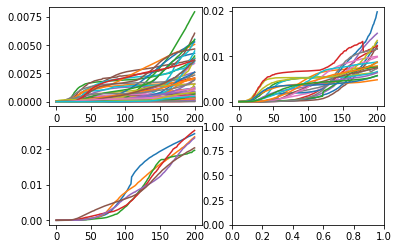

In [57]:
fig, axes = plt.subplots(nrows=2, ncols=2)
df0_cp.plot(legend='', ax=axes[0,0])
df1_cp.plot(legend='', ax=axes[0,1])
df2_cp.plot(legend='', ax=axes[1,0])
df3_cp.plot(legend='', ax=axes[1,1])

## HAC on z-transform

In [78]:
# A function that plots the hierarchy/dendogram 
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

In [99]:
hac_z = AgglomerativeClustering(distance_threshold=10, n_clusters=None, linkage='complete', compute_full_tree=True)
hac_z= hac_z.fit(df_z.T)

In [100]:
print(max(hac_z.labels_)) #max + 1 is the number of clusters

3


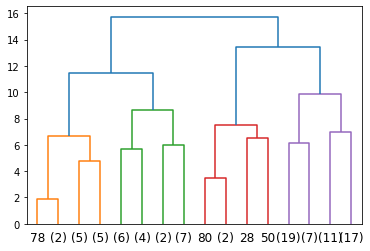

In [101]:
plot_dendrogram(hac_z, truncate_mode='level', p=3)

In [102]:
labels_hac_z = hac_z.labels_
labels_hac_z

array([0, 0, 0, 1, 0, 0, 1, 3, 0, 0, 1, 0, 0, 0, 0, 1, 0, 3, 0, 0, 0, 3,
       0, 1, 3, 1, 0, 0, 2, 3, 0, 0, 0, 0, 3, 0, 3, 0, 0, 0, 0, 3, 1, 1,
       0, 3, 0, 0, 0, 0, 2, 0, 3, 0, 3, 0, 0, 0, 2, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 3, 3, 0, 2, 1, 2, 0, 1, 1, 0, 1,
       0, 0, 0], dtype=int64)

In [105]:
print("Countries in cluster 0:", np.count_nonzero(labels_hac_z == 0))
print("Countries in cluster 1:", np.count_nonzero(labels_hac_z == 1))
print("Countries in cluster 2:", np.count_nonzero(labels_hac_z == 2))
print("Countries in cluster 3:", np.count_nonzero(labels_hac_z == 3))

Countries in cluster 0: 54
Countries in cluster 1: 19
Countries in cluster 2: 5
Countries in cluster 3: 13


In [103]:
#This is to make a new data frame for each cluster and then drop the countries whcih is not in the cluster
df0_hac_z = df_z.copy()
df1_hac_z = df_z.copy()
df2_hac_z = df_z.copy()
df3_hac_z = df_z.copy()

for i in range(len(labels_hac_z)):
    if labels_hac_z[i] == 0:
        drop_c = countries_z[i]
        df1_hac_z.drop([drop_c], axis=1, inplace=True)
        df2_hac_z.drop([drop_c], axis=1, inplace=True)
        df3_hac_z.drop([drop_c], axis=1, inplace=True)
    elif labels_hac_z[i] == 1:
        drop_c = countries_z[i]
        df0_hac_z.drop([drop_c], axis=1, inplace=True)
        df2_hac_z.drop([drop_c], axis=1, inplace=True)
        df3_hac_z.drop([drop_c], axis=1, inplace=True)
    elif labels_hac_z[i] == 2:
        drop_c = countries_z[i]
        df0_hac_z.drop([drop_c], axis=1, inplace=True)
        df1_hac_z.drop([drop_c], axis=1, inplace=True)
        df3_hac_z.drop([drop_c], axis=1, inplace=True)
    elif labels_hac_z[i] == 3:
        drop_c = countries_z[i]
        df0_hac_z.drop([drop_c], axis=1, inplace=True)
        df1_hac_z.drop([drop_c], axis=1, inplace=True)
        df2_hac_z.drop([drop_c], axis=1, inplace=True)

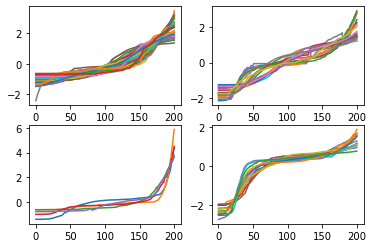

In [104]:
fig, axes = plt.subplots(nrows=2, ncols=2)
df0_hac_z.plot(legend='', ax=axes[0,0])
df1_hac_z.plot(legend='', ax=axes[0,1])
df2_hac_z.plot(legend='', ax=axes[1,0])
df3_hac_z.plot(legend='', ax=axes[1,1])